In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [23]:
data = pd.read_csv('used_cars_data.csv')

In [24]:
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [25]:
len(data)

7253

In [26]:
data.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [27]:
data['New_Price'].isnull().sum()

6247

In [28]:
# data.loc[data['New_Price']!='NULL', 'Price'] = data['New_Price']
data.loc[data['New_Price'].notna(), 'Price'] = data['New_Price']

In [29]:
data = data.drop(['New_Price'], axis=1)

In [31]:
null_mileage = data.loc[data['Mileage'].isnull()]
len(null_mileage)

2

In [32]:
data = data.dropna(subset=['Mileage'])
len(data)

7251

In [33]:
null_engine = data.loc[data['Engine'].isnull()]
len(null_engine) 

46

In [34]:
data = data.dropna(subset=['Engine'])
len(data)

7205

In [35]:
null_seats = data.loc[data['Seats'].isnull()]
len(null_seats)

7

In [36]:
data = data.dropna(subset=['Seats'])
len(data)

7198

In [37]:
data['Price'].isnull().sum()

1041

In [38]:
test_data = data.loc[data['Price'].isnull()]
len(test_data)

1041

In [39]:
data = data.dropna(subset = ['Price'])
len(data)

6157

In [40]:
frames = [test_data, null_mileage, null_engine, null_seats]

In [41]:
test_data = pd.concat(frames)

In [42]:
len(test_data)

1096

In [43]:
# only this data will be used as it is free from null values
len(data)

6157

In [44]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.5
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [49]:
#1900 cars
# data['Name'].nunique(dropna=True)

1900

In [52]:
#across 11 locations
uni_loc = data['Location'].unique()

In [53]:
# uni_loc

# ['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
#        'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad']

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [55]:
# data from 1998 - 2018
years = data['Year'].unique()
years

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [64]:
# data['Name'].str.contains('Land Rover').any()
# changing land rover -> land-rover since it's picking only first word
data['Name'].str.contains('Land Rover').sum()

57

In [78]:
data['Name'] = data['Name'].str.replace('Land Rover', 'Land-Rover')

In [85]:
data['Brand'] = data['Name'].str.split().str.get(0);

In [89]:
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land-Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.5,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.0,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7228,7228,Tata Tiago 1.05 Revotorq XT Option,Pune,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0,7.06 Lakh,Tata
7231,7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,8.79 Lakh,Ford
7232,7232,Jeep Compass 1.4 Sport,Mumbai,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0,18.16 Lakh,Jeep
7235,7235,Maruti Vitara Brezza ZDi,Kochi,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,10.57 Lakh,Maruti


In [116]:
brand = len(data.loc[data['Brand'] == 'Maruti'])
brand

1240

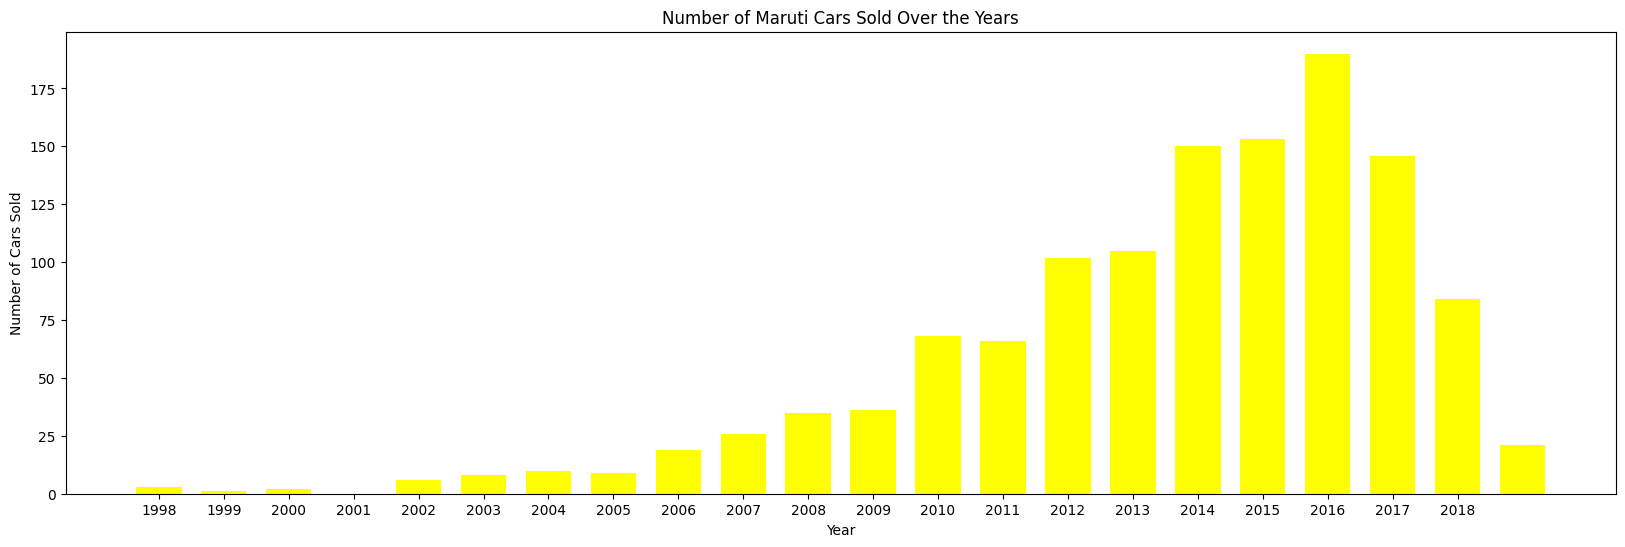

In [188]:
# df = data.loc[(data['Brand']=='Maruti') & (data['Year'] == 2018)]
# df

# def revenue_per_year(df, brand):
#     Brand = df[(df.Brand==brand)]
#     years = df['Year'].unique()
#     fig = plt.figure(figsize = (10, 5))
#     plt.bar(years, len((df.Brand == brand) &(df.Year ==years),color='Yellow',width=0.7)
#     plt.xlabel("Year")
#     plt.ylabel("Price (Lakh Indian Rupees)")
#     plt.title("Revenue over the years")
#     plt.show()


def revenue_per_year(data, brand):
    # Convert the data into a DataFrame
    df = pd.DataFrame(data)

    # Filter rows based on the given brand name
    Brand = df[df['Brand'] == brand]

    # Group by the 'Year' and count the number of cars sold each year
    cars = Brand.groupby('Year').size()

    # Plotting the graph
    plt.figure(figsize=(20, 6))
    plt.bar(cars.index, cars.values, color='yellow', width=0.7)
    plt.title(f'Number of {brand} Cars Sold Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Cars Sold')
    # initially hard-coded
    plt.xticks(np.arange(1998, 2019, 1))
    plt.legend

In [193]:
Brands = data['Brand'].unique()

In [194]:
def rev_for_each_brand():
    for x in Brands:
        revenue_per_year(data, x)

In [196]:
# either calling the function
# rev_for_each_brand()